In [18]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Overview

Given a skewer of data ($\delta_{DM}^2$), we optimize for the underlying information ($\delta_{DM}$)

## Get the input and (fake) data

In [16]:
filename = "../../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

h5 = h5py.File(filename,'r')

In [19]:
# take a skewer
shape = [1, 1, 1024]
inds = (0, 0, slice(0, shape[2]))

delta_true = h5['native_fields']['matter_density'][inds] # true DM density
data = tf.math.pow(delta_true, 2)

In [55]:
h5.close()

In [ ]:
# plotting the data
plt.figure(figsize=(10,4))
plt.plot(delta_true)
plt.title('delta_dm (true)')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(np.log10(delta_true))
plt.title('log10(delta)')
plt.show()

In [26]:
np.mean(np.log10(delta_true[delta_true > 0]))

-0.5007257

In [52]:
# create starting point for optimization (random noise)
tf.random.set_seed(5)
log10_noise = tf.random.normal([shape[2]], 0, 0.5, tf.float32, seed=1)
delta_pred = 10**log10_noise

/global/homes/j/jupiter/.conda/envs/lya-tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


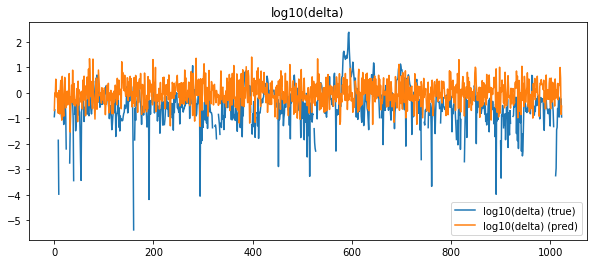

In [54]:
plt.figure(figsize=(10,4))

plt.plot(np.log10(delta_true), label='log10(delta) (true)')
plt.plot(np.log10(delta_pred), label = 'log10(delta) (pred)')
plt.title('log10(delta)')

plt.legend()
plt.show()

## Optimization

[TensorFlow Guide: Basic training loops](https://www.tensorflow.org/guide/basic_training_loops)

[Training and evaluating a model](https://www.tensorflow.org/guide/keras/train_and_evaluate/)

In [ ]:
#...

## Exploring the file's properties

In [25]:
# print relevant attributes (i.e. the metadata)
print("Format:", h5.attrs['format'])
print()

for key in h5['domain'].attrs.keys():
    print(key + ": " + str(h5['domain'].attrs[key]))
print()

for key in h5['universe'].attrs.keys():
    print(key + ": " + str(h5['universe'].attrs[key]))

Format: b'nyx-lyaf'

shape: [1024 1024 1024]
size: [21.09375 21.09375 21.09375]

hubble: 0.675
omega_b: 0.0487
omega_l: 0.69
omega_m: 0.31
redshift: 2.9999991588912964


In [8]:
# print the attribute keys of every group/dataset 
print(h5)
print(h5.attrs.keys())

def print_attrs(name, object):
    print(object)
    print(object.attrs.keys())
    
h5.visititems(print_attrs)

<HDF5 file "sim2_z3_FGPA_cgs.h5" (mode r)>
<KeysViewHDF5 ['format']>
<HDF5 group "/aux_fields" (3 members)>
<KeysViewHDF5 []>
<HDF5 dataset "DM_vx": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 dataset "DM_vy": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 dataset "DM_vz": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 group "/derived_fields" (5 members)>
<KeysViewHDF5 []>
<HDF5 dataset "HI_number_density": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "flux_real": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "flux_red": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "tau_real": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "tau_red": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 group "/domain" (0 members)>
<KeysViewHDF5 ['shape', 'size']>
<HDF5 group "/native_fields" (9 members)>
<KeysViewHDF

In [31]:
# print the dataset names
for key in h5.keys():
    temp = h5[key]
    print(f'Datasets in {temp.name}: {list(temp.keys())}\n')

Datasets in /aux_fields: ['DM_vx', 'DM_vy', 'DM_vz']

Datasets in /derived_fields: ['HI_number_density', 'flux_real', 'flux_red', 'tau_real', 'tau_red']

Datasets in /domain: []

Datasets in /native_fields: ['baryon_density', 'matter_density', 'particle_vx', 'particle_vy', 'particle_vz', 'temperature', 'velocity_x', 'velocity_y', 'velocity_z']

Datasets in /universe: []



In [11]:
# print the units of every field
for field in h5['derived_fields']:
    print('Units of ' + field + ':', h5['derived_fields'][field].attrs['units'])
    
print()

for field in h5['native_fields']:
    print('Units of ' + field + ':', h5['native_fields'][field].attrs['units'])

Units of HI_number_density: b'cm**-3'
Units of flux_real: b'none'
Units of flux_red: b'none'
Units of tau_real: b'none'
Units of tau_red: b'none'

Units of baryon_density: b'(mean)'
Units of matter_density: b'(mean)'
Units of particle_vx: b'km/s'
Units of particle_vy: b'km/s'
Units of particle_vz: b'km/s'
Units of temperature: b'K'
Units of velocity_x: b'km/s'
Units of velocity_y: b'km/s'
Units of velocity_z: b'km/s'


In [12]:
h5.close()